<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Laboratory-3:-Linear-Algebra" data-toc-modified-id="Laboratory-3:-Linear-Algebra-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Laboratory 3: Linear Algebra</a></span><ul class="toc-item"><li><span><a href="#Chris-Rodell" data-toc-modified-id="Chris-Rodell-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Chris Rodell</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Problem-Two:-Condition-number-for-Dirichlet-problem" data-toc-modified-id="Problem-Two:-Condition-number-for-Dirichlet-problem-1.1.0.1"><span class="toc-item-num">1.1.0.1&nbsp;&nbsp;</span>Problem Two: Condition number for Dirichlet problem</a></span></li><li><span><a href="#Problem-Three:-Condition-number-for-Neumann-problem" data-toc-modified-id="Problem-Three:-Condition-number-for-Neumann-problem-1.1.0.2"><span class="toc-item-num">1.1.0.2&nbsp;&nbsp;</span>Problem Three: Condition number for Neumann problem</a></span></li><li><span><a href="#Problem-Five:-Consider-a-long-hallway-in-an-office-building.-If-we-assume-that-any" data-toc-modified-id="Problem-Five:-Consider-a-long-hallway-in-an-office-building.-If-we-assume-that-any-1.1.0.3"><span class="toc-item-num">1.1.0.3&nbsp;&nbsp;</span>Problem Five: Consider a long hallway in an office building. If we assume that any</a></span></li></ul></li></ul></li></ul></li></ul></div>

 # Laboratory 3: Linear Algebra
 ## Chris Rodell
 #### Problem Two: Condition number for Dirichlet problem
 Boundary condtions for a Dirichlet problem are:
 $$
 u(0)=u(1)=0
 $$
 *Solution of an ODE Using Linear Algebra*
 - a\) Using Python, compute the condition number for the matrix
 𝐴1 from Equation Differential System Matrix for several values of
  𝑁 between 5 and 50. ( Hint: This will be much easier if you write
 a small Python function that outputs the matrix 𝐴 for a given value
  of 𝑁.)

In [2]:

import numpy as np
import matplotlib.pyplot as plt

def Dirichlet(N):
    """
    This function that outputs a 
    matrix A & A2 for a given value of N
    using Dirichlet boundary condition.
    """
    A = np.zeros((N,N))
    for index in range(1,N-1):
        A[index,index] = -2
        A[index,index + 1] = A[index,index - 1] = 1

    A[0,0] = A[-1,-1] = 1
    A2 = A[1:-1,1:-1]
    KA = np.linalg.cond(A)
    KA2 = np.linalg.cond(A2)

    return A, A2, KA, KA2

## Loop and calcualte the condition number (KA & KA2) for the matrix (A & A2)
N = np.arange(5,55,5)
A_list, A2_list, KA_list, KA2_list = [], [], [], []
Ashape_list, A2shape_list = [], []
for size in N:
    A, A2, KA, KA2 = Dirichlet(size)
    A_list.append(A)
    A2_list.append(A2)
    KA_list.append(KA)
    KA2_list.append(KA2)
    Ashape_list.append(A.shape[0])
    A2shape_list.append(A2.shape[0])


    ## Print condtion number of matrix A
    print(f"Matrix A Size: {A.shape} Condition number: {KA}")



A_list[0]


Matrix A Size: (5, 5) Condition number: 7.643905814828506
Matrix A Size: (10, 10) Condition number: 33.07381141107933
Matrix A Size: (15, 15) Condition number: 79.37178441258116
Matrix A Size: (20, 20) Condition number: 146.08958623336363
Matrix A Size: (25, 25) Condition number: 233.13401346970113
Matrix A Size: (30, 30) Condition number: 340.473713371065
Matrix A Size: (35, 35) Condition number: 468.09526944756664
Matrix A Size: (40, 40) Condition number: 615.9920063572671
Matrix A Size: (45, 45) Condition number: 784.1602362082386
Matrix A Size: (50, 50) Condition number: 972.5977580919995


array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  1.]])

<i> For 5 grid points the matrix should be 6x6

 - b\) Can you conjecture how the condition number (K) of 𝐴 depends on 𝑁?
 $$
 K=\|A\|\left\|A^{-1}\right\|
 $$
 **As the size of the matrix increases the condition number
 becomes larger. Meaning that the A becomes ill-condition
 as it grows in size (ie more difficult to solve).
 Another way you could say this is the range in the
 eigenvalue is increasing making the condition number
 large as the matrix become larger and more difficult to solve**

[Text(0, 0.5, 'Condtion Number (K)'),
 Text(0.5, 0, 'N (size of one side of matrix)')]

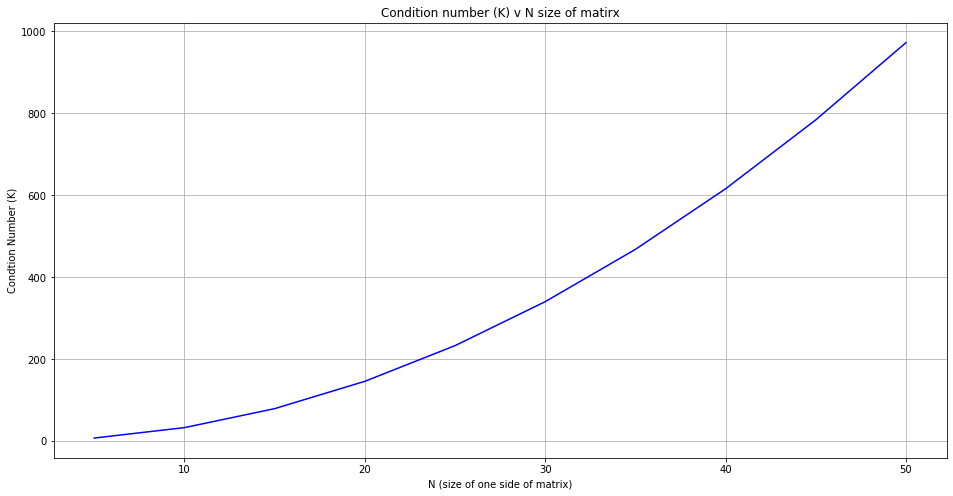

In [3]:

## Plt condition number (K) v N size of matirx 𝐴 
fig,ax=plt.subplots(1,figsize=(16,8))
ax.set_title("Condition number (K) v N size of matirx")
# ax.scatter(N,KA_list, marker = '+', color = 'red')
ax.plot(Ashape_list,KA_list, color = 'blue', lw = 1.5)
ax.grid(True)
ax.set(xlabel='N (size of one side of matrix)',ylabel='Condtion Number (K)')



<i> Is this exponential? quadratic?  how could you figure it out?

 - c\) Another way to write the system of equations is to substitute
 the boundary conditions into the equations, and thereby reduce size
 of the problem to one of 𝑁−1 equations in 𝑁−1 unknowns. The corresponding
 matrix is simply the 𝑁−1 by 𝑁−1 submatrix of 𝐴1 from Equation
 Differential System Matrix.

 Does this change in the matrix make a significant difference in the condition number?


 **The change in the matrix makes a difference in the condition
 number but it is not significant. It only slightly improves the
 easy in solving the equation.**


In [4]:
## Print condtion number of matrix A2 (the reduced matrix)
for size in range(len(N)):
    print(f"Matrix A2 (reduced) Size: {A2_list[size].shape} Condition number: {KA2_list[size]}")


Matrix A2 (reduced) Size: (3, 3) Condition number: 5.8284271247461925
Matrix A2 (reduced) Size: (8, 8) Condition number: 32.16343747752635
Matrix A2 (reduced) Size: (13, 13) Condition number: 78.76998224097105
Matrix A2 (reduced) Size: (18, 18) Condition number: 145.64157866809683
Matrix A2 (reduced) Size: (23, 23) Condition number: 232.777626218407
Matrix A2 (reduced) Size: (28, 28) Condition number: 340.17799078991453
Matrix A2 (reduced) Size: (33, 33) Condition number: 467.8426288390642
Matrix A2 (reduced) Size: (38, 38) Condition number: 615.771522789354
Matrix A2 (reduced) Size: (43, 43) Condition number: 783.9646644423822
Matrix A2 (reduced) Size: (48, 48) Condition number: 972.4220495558909


<i> Okay, you've got the ratio of the sizes of matrices for a and c correct.

[Text(0, 0.5, 'Condtion Number (K)'),
 Text(0.5, 0, 'N (size of one side of matrix)')]

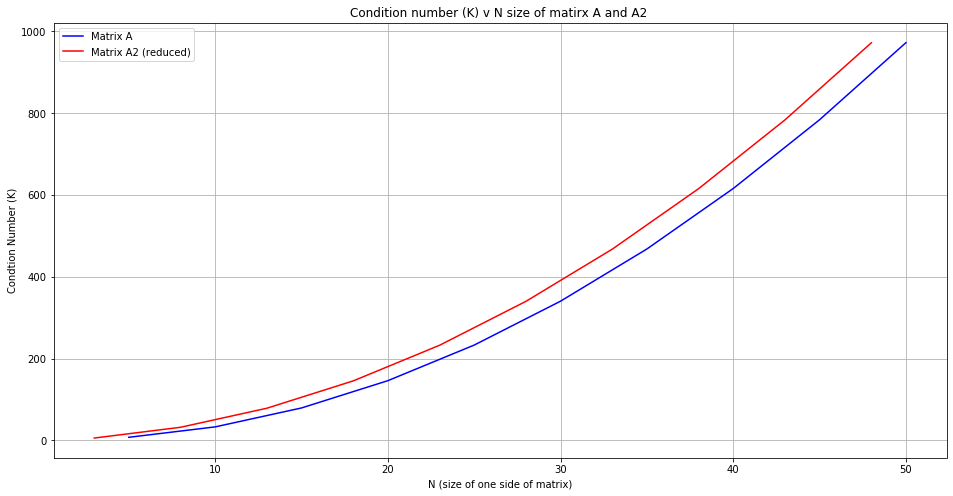

In [5]:

## Plt condition number (K) v N size of matirx A2 
fig,ax=plt.subplots(1,figsize=(16,8))
ax.set_title("Condition number (K) v N size of matirx A and A2 ")
# ax.plot(np.log(Ashape_list),KA_list, color = 'blue', lw = 1.5, label = "Matrix A")
ax.plot(Ashape_list,KA_list, color = 'blue', lw = 1.5, label = "Matrix A")
ax.plot(A2shape_list,KA2_list, color = 'red', lw = 1.5, label = "Matrix A2 (reduced)")
ax.grid(True)
ax.legend()
ax.set(xlabel='N (size of one side of matrix)',ylabel='Condtion Number (K)')




<i> You should plot versus the size of the system, not the matrix size.  Then they become very similar.

 #### Problem Three: Condition number for Neumann problem
 Boundary condtions for a discrete Neumann problem are:
 $$
 u_{-1}-2 u_{0}+u_{1}=d^{2} f_{0} \quad \text { and } \quad u_{N-1}-2 u_{N}+u_{N+1}=d^{2} f_{N}
 $$


 - a\) Derive the matrix corresponding to the linear system to be solved in both
  of these cases.
 **SEE ATTACHED PNG IF NO DISPLAY**
 <img src='matrix_q3.png' width='60%' />


<i> matrix_q3.png only includes one of the two matrices

In [6]:

def Neumann(N):
    """
    This function that outputs a 
    matrix A3 for a given value of N
    using Neumann Boundary Conditions
    """
    A = np.zeros((N,N))
    for index in range(1,N-1):
        A[index,index] = -2
        A[index,index + 1] = A[index,index - 1] = 1

    A[0,0] = A[-1,-1] =1
    A3 = A[1:-1,1:-1]
    A3[0,1] = A3[-1,-2] = 2
    c = np.full(A3.shape[0],1)

    c = (c/N)
    A3 =np.vstack([A3,c])

    KA3 = np.linalg.cond(A3)

    return A3, KA3


 - b\) How does the conditioning of the resulting matrix depend
 on the the size of the system?
 $$
 \\
 $$
 **The condition of the matrix becomes worse as the size of the matrix increase.
 You can see this graph below. A (N) size increase the condition number grows
  more and more NOTE it's not exponential was tested by plotting the log of the
  condition number and size of array.**


In [7]:
## Loop and calcualte the condition number (KA & KA2) for the matrix (A & A2)
N = np.arange(5,55,5)
A3_list,  KA3_list, A3shape_list = [], [], []

for size in N:
    A3, KA3 = Neumann(size)
    A3_list.append(A3)
    KA3_list.append(KA3)
    A3shape_list.append(A3.shape[0])

    ## Print condtion number of matrix A
    print(f"Matrix A3 Size: {A3.shape} Condition number: {KA3}")



Matrix A3 Size: (4, 3) Condition number: 12.247448713915889
Matrix A3 Size: (9, 8) Condition number: 21.385953804600508
Matrix A3 Size: (14, 13) Condition number: 61.200256469355885
Matrix A3 Size: (19, 18) Condition number: 121.41295089805061
Matrix A3 Size: (24, 23) Condition number: 202.0391032274652
Matrix A3 Size: (29, 28) Condition number: 303.0946693055865
Matrix A3 Size: (34, 33) Condition number: 424.58656748511504
Matrix A3 Size: (39, 38) Condition number: 566.5145790030663
Matrix A3 Size: (44, 43) Condition number: 728.8756649633553
Matrix A3 Size: (49, 48) Condition number: 911.6667126410914



 - c\) Is it better or worse than for Dirichlet boundary conditions?
 $$
 \\
 $$
 ** This depends on when you are comparing to the Dirichlet boundary conditions
  to the Newmann boundary condition. At a small size matrix, both the Dirichlet
  boundary condition have a smaller (easier to solve) condition number than the
  Newmann boundary condition. However, as the size of the matrix values increases
  the eigenvalue range is less for the Newmann boundary condition (by this I mean
  has a smaller boundary condition number).**


<i> They'll be even closer at high numbers if you use the system size

[Text(0, 0.5, 'Condtion Number (K)'),
 Text(0.5, 0, 'N (size of one side of matrix)')]

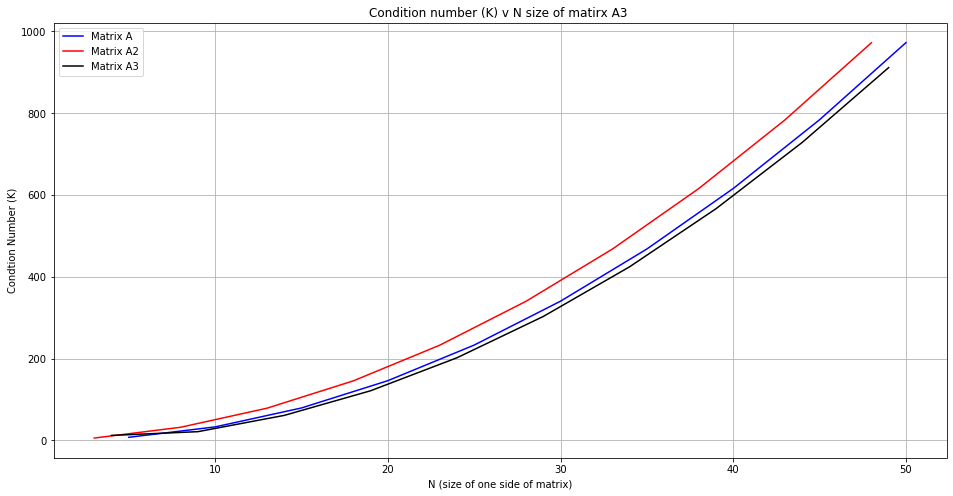

In [8]:

## Plt condition number (K) v N size of matirx A3 
fig,ax=plt.subplots(1,figsize=(16,8))
ax.set_title("Condition number (K) v N size of matirx A3 ")
ax.plot(Ashape_list,KA_list, color = 'blue', lw = 1.5, label = "Matrix A")
ax.plot(A2shape_list,KA2_list, color = 'red', lw = 1.5, label = "Matrix A2")
ax.plot(A3shape_list,KA3_list, color = 'k', lw = 1.5, label = "Matrix A3")
ax.grid(True)
ax.legend()
ax.set(xlabel='N (size of one side of matrix)',ylabel='Condtion Number (K)')




 #### Problem Five: Consider a long hallway in an office building. If we assume that any
 cigarrette smoke, mixes across the width of the hallway and vertically
 through the depth of the hallway much faster than it mixes along the
 hallway, we can write the diffusion of cigaratte smoke as an equation
 where S is the concentration of smoke, κ is the rate of diffusion of
 smoke, γ is the rate at which the smoke sticks to the walls or otherwise
 leaves the system, α(x) is the sources of smoke, t is the time and x is
 distance along the hallway.


 - a\) Write the appropriate equation for the steady state.


 $$
 \partial S / \partial t=\kappa \frac{\partial^{2} S}{\partial x^{2}}-\gamma S+\alpha(x)
 $$

 $$
 \frac{\partial S}{\partial t}=0\quad   \text{Steady State}
 $$

 $$
 0 =\kappa \frac{\partial^{2} S}{\partial x^{2}}-\gamma S+\alpha(x)
 $$


 $$
 \kappa\left(\frac{S_{i+1}-2 S_{i}+S_{i-1}}{d^{2}}\right)-\gamma S+\alpha_{i}=0
 $$

 $$
 S_{i+1}-S_{i}\left(2+\frac{\gamma d^{2}}{\kappa}\right)+S_{i-1}=\frac{d^{2}}{\kappa} \alpha_{i}
 $$

 $$
 \gamma = 0\quad   \text{No Sink}
 $$

 $$
 S_{i+1}-2 S_{i}+S_{i-1}=\frac{d^{2}}{\kappa} \alpha_{i}
 $$
 $$
 \\
 \\
 $$
 - b\) Discretize the hall into N segments and write the equation for the
 steady state as a matrix equation.
 $$
 \\
 \\
 $$
 **SEE ATTACHED PNG IF NO DISPLAY**
 <img src='matrix_q5.png' width='60%' />



<i> Explanation of the boundary conditions?

In [14]:

def NeumannCig(N, gamma, alpha, x):
    """
    This function that outputs a 
    matrix A4 for a given value of N
    using Neumann Boundary Conditions
    """
    kappa = 0.05 
    dx    = N * 20 
    

    A = np.zeros((N,N))
    for index in range(1,N-1):
        A[index,index] = -2 + ((gamma * dx**2)/kappa)
        A[index,index + 1] = A[index,index - 1] = 1

    A[0,0] = A[-1,-1] =1
    A4 = A[1:-1,1:-1]
    A4[0,1] = A4[-1,-2] = 2

    b = (dx**2/(kappa*alpha*x))
    c = np.full(A4.shape[0],b)


    KA4 = np.linalg.cond(A4)
    if gamma == 0:
        S4 = np.inf
    else:
        S4 = np.linalg.solve(A4,c)

    return A4, KA4, S4



<i> dx = 20 / N

In [20]:
A4, KA4, S4 = NeumannCig(8, gamma, alpha, x)
A4

array([[140.22222222,   2.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  1.        , 140.22222222,   1.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   1.        , 140.22222222,   1.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   1.        , 140.22222222,
          1.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   1.        ,
        140.22222222,   1.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          2.        , 140.22222222]])

 - c\) Taking α(x) = 0.005δ(x∗) kg m−1s
 −1 where you can choose the
 point x∗, κ = 0.05m2s−1, γ = (3600 s)−1
 , find the solution for
 your choice of N between 5 and 15. Take the length of the hall as
 20 m.

In [18]:

## Loop and calcualte the solution for the matrix (A4)
## gamma = 1/3600
## alpha = 0.005
N     = np.arange(7,18,1)
gamma = (1/3600)
alpha = 0.005
x     = 4  ## Distance down hallway
A4_list,  KA4_list = [], []

for size in N:
    A4, KA4, S4 = NeumannCig(size, gamma, alpha, x)
    A4_list.append(A4)
    KA4_list.append(KA4)

    ## Print condtion number of matrix A
    print(f"Matrix A4 Size: {A4.shape} the solution: {S4[0]}")



Matrix A4 Size: (5, 5) the solution: 180000.0
Matrix A4 Size: (6, 6) the solution: 180000.00000000003
Matrix A4 Size: (7, 7) the solution: 180000.0
Matrix A4 Size: (8, 8) the solution: 180000.00000000003
Matrix A4 Size: (9, 9) the solution: 180000.00000000003
Matrix A4 Size: (10, 10) the solution: 180000.0
Matrix A4 Size: (11, 11) the solution: 180000.0
Matrix A4 Size: (12, 12) the solution: 180000.0
Matrix A4 Size: (13, 13) the solution: 180000.0
Matrix A4 Size: (14, 14) the solution: 180000.00000000003
Matrix A4 Size: (15, 15) the solution: 179999.99999999997


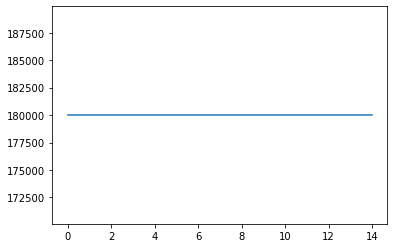

In [19]:
plt.plot(S4)

<i> Solution is not just one point, but the concentration along the hallway

 - d\) What is the condition number of the matrix?

In [11]:

## Loop and calcualte the condition number (KA4) for the matrix (A4)
## gamma = 1/3600
## alpha = 0.005
N = np.arange(7,18,1)
gamma = (1/3600)
alpha = 0.005
A4_list,  KA4_list = [], []

for size in N:
    A4, KA4, S4 = NeumannCig(size, gamma, alpha, x)
    A4_list.append(A4)
    KA4_list.append(KA4)

    ## Print condtion number of matrix A
    print(f"Matrix A4 Size: {A4.shape} Condition number: {KA4}")


Matrix A4 Size: (5, 5) Condition number: 1.0393319662562162
Matrix A4 Size: (6, 6) Condition number: 1.029672627258267
Matrix A4 Size: (7, 7) Condition number: 1.0232139709651555
Matrix A4 Size: (8, 8) Condition number: 1.0186716372710007
Matrix A4 Size: (9, 9) Condition number: 1.0153511576815386
Matrix A4 Size: (10, 10) Condition number: 1.0128482142532576
Matrix A4 Size: (11, 11) Condition number: 1.0109136845548548
Matrix A4 Size: (12, 12) Condition number: 1.0093869695558315
Matrix A4 Size: (13, 13) Condition number: 1.0081606252229254
Matrix A4 Size: (14, 14) Condition number: 1.007160501158781
Matrix A4 Size: (15, 15) Condition number: 1.0063340523692539


 - e\) If γ is 0 what is the condition number of the matrix? Physically
 why is there no single solution?
 $$
 \\
 $$
 **With γ set equal to zero means there is no sink (ie smoke will
 continue to accumulate). This is not physical because in real life the
  walls are permeable and smoke will "sink" into the walls (material dependent
 of course, but regardless the smoke will escape somewhere).**

<i> Fair enough.  I was expecting because the smoke would keep increasing there would be no steady state

In [12]:


## Loop and calcualte the condition number (KA4) for the matrix (A4)
## gamma = 0
## alpha = 0
N = np.arange(7,18,1)
gamma = 0
alpha = 0.005
A4_list,  KA4_list = [], []

for size in N:
    A4, KA4, S4 = NeumannCig(size, gamma, alpha, x)
    A4_list.append(A4)
    KA4_list.append(KA4)

    ## Print condtion number of matrix A
    print(f"Matrix A4 Size: {A4.shape} Condition number: {KA4}")


Matrix A4 Size: (5, 5) Condition number: 5.032046816506539e+16
Matrix A4 Size: (6, 6) Condition number: 1.0940526563829056e+16
Matrix A4 Size: (7, 7) Condition number: 1.5544883919358014e+16
Matrix A4 Size: (8, 8) Condition number: 2.750341184314299e+16
Matrix A4 Size: (9, 9) Condition number: 1.3302595286647701e+17
Matrix A4 Size: (10, 10) Condition number: 1.902370903789813e+17
Matrix A4 Size: (11, 11) Condition number: 2.1272854874742218e+17
Matrix A4 Size: (12, 12) Condition number: 4.44321537708298e+16
Matrix A4 Size: (13, 13) Condition number: 8.460354605250522e+17
Matrix A4 Size: (14, 14) Condition number: 2.505265985251208e+16
Matrix A4 Size: (15, 15) Condition number: 3.750646817353567e+16


 - f\) If γ is 0 and α is 0, why physically is there no single solution?
 $$
 \\
 $$
 **To continue with the idea above (e) if there is no smoke leaving the
  system smoke will continue to accumulate however if there is no alpha
  than there is no "input " or smoke being introduced to the system in the
  first place! So smoke can not accumulate without an input...not physical **

<i> Yes, it can't accumulate, but it could just hang around.

In [13]:

## Loop and calcualte the condition number (KA4) for the matrix (A4)
## gamma = 0
## alpha = 0
N = np.arange(7,18,1)
gamma = 0
alpha = 0
A4_list,  KA4_list = [], []

for size in N:
    A4, KA4, S4 = NeumannCig(size, gamma, alpha, x)
    A4_list.append(A4)
    KA4_list.append(KA4)

    ## Print condtion number of matrix A
    print(f"Matrix A4 Size: {A4.shape} Condition number: {KA4}")





Matrix A4 Size: (5, 5) Condition number: 5.032046816506539e+16
Matrix A4 Size: (6, 6) Condition number: 1.0940526563829056e+16
Matrix A4 Size: (7, 7) Condition number: 1.5544883919358014e+16
Matrix A4 Size: (8, 8) Condition number: 2.750341184314299e+16
Matrix A4 Size: (9, 9) Condition number: 1.3302595286647701e+17
Matrix A4 Size: (10, 10) Condition number: 1.902370903789813e+17
Matrix A4 Size: (11, 11) Condition number: 2.1272854874742218e+17
Matrix A4 Size: (12, 12) Condition number: 4.44321537708298e+16
Matrix A4 Size: (13, 13) Condition number: 8.460354605250522e+17
Matrix A4 Size: (14, 14) Condition number: 2.505265985251208e+16
Matrix A4 Size: (15, 15) Condition number: 3.750646817353567e+16


/Users/sallen/miniconda3/envs/numeric/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
